# Projet 4 : Anticiper les besoins en consommation électrique de bâtiments
*Pierre-Eloi Ragetly*

Ce projet fait parti du parcours *DataScientist* d'OpenClassrooms.

L'objectif principal est de trouver un modèle permettant de prédire **les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l'habitation.**

Pour cela nous disposons des données de la ville de Seattle pour les années 2015 et 2016. Ces données sont à récupérer sur le site kaggle.

# Partie II : Feature Engineering

Ce notebook a pour but de présenter le travail effectué sur l'ingénierie de variables. C'est à dire toutes les transformations effectuées sur les variables afin d'améliorer les performances du modèle. Les données nettoyées (cf Partie I), seront utilisées.

De plus, Un premier tri parmi les variables sera effectué. Celles qui ne seront clairement pas pertinentes pour l'exercice de modélisation, par exemple l'adresse des bâtiments, seront écartées.

In [52]:
# Import des librairies usuelles
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import os

In [53]:
# Change some default parameters of matplotlib using seaborn
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'axes.titleweight': 'bold'})
sns.set(style='ticks')
current_palette = sns.color_palette('RdBu')
sns.set_palette(current_palette)

In [54]:
data_2015 = pd.read_csv('data/data_2015.csv')
data_2016 = pd.read_csv('data/data_2016.csv')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sélection-de-variables" data-toc-modified-id="Sélection-de-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sélection de variables</a></span></li><li><span><a href="#Analyse-des-variables-clés" data-toc-modified-id="Analyse-des-variables-clés-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse des variables clés</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-variables-à-prédire" data-toc-modified-id="Analyse-des-variables-à-prédire-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analyse des variables à prédire</a></span></li><li><span><a href="#Analyse-de-l'ENERGY-STAR-Score" data-toc-modified-id="Analyse-de-l'ENERGY-STAR-Score-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyse de l'ENERGY STAR Score</a></span></li></ul></li><li><span><a href="#Traitement-des-variables-quantitatives" data-toc-modified-id="Traitement-des-variables-quantitatives-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Traitement des variables quantitatives</a></span><ul class="toc-item"><li><span><a href="#Les-variables-de-consommation" data-toc-modified-id="Les-variables-de-consommation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Les variables de consommation</a></span></li></ul></li></ul></div>

In [55]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Latitude', 'Longitude',
       'Address', 'City', 'State', 'ZipCode'],
      dtyp

## Sélection de variables

Nombre de variables ne sont pas pertinentes pour modéliser la consommation en énergie ou l'émission de CO2. Elles viennent donc polluer le jeu de données et risque d'abaisser l'efficacité de notre modèle, il faut donc les écarter avant de procéder à l'entrainement des modèles.

Parmi elles nous allons trouver des variables renvoyant toutes la même donnée :
- DataYear
- ComplianceStatus
- City
- State

Nous avons aussi des variables qui pourraient s'apparenter à un identifiant. Ayant déja choisi comme identifiant *OSEBuildingID* (cf. Partie I), elles sont donc redondantes et peuvent être écartées sans risquer de perdre de l'information :
- PropertyName
- TaxParcelIdentificationNumber
- Address

D'autres n'auront clairement aucun lien avec les attributs que nous cherchons à modéliser :
- YearsENERGYSTARCertified
- DefaultData

Une variable contient très peu de valeurs renseignée, cinq en tout. De plus, il s'agit de texte, et est donc difficilement utilisable par les algorithmes d'apprentissage automatique classiques :
- Comments

Pour finir, certaines sont redondantes :
- BuildingType (redondante avec PrimaryPropertyType, cf. Partie I)
- CouncilDistrictCode (redondante avec Neighborhood)
- ZipCode (redondante avec Neighborhood)

In [56]:
data_2015['CouncilDistrictCode'].value_counts()

7    375
2    289
3    171
4    117
5    107
1     99
6     94
Name: CouncilDistrictCode, dtype: int64

In [57]:
data_2015['Neighborhood'].value_counts()

DOWNTOWN                 253
GREATER DUWAMISH         248
EAST                     111
MAGNOLIA / QUEEN ANNE    105
LAKE UNION               103
NORTHEAST                 92
NORTHWEST                 76
BALLARD                   54
NORTH                     53
CENTRAL                   44
SOUTHEAST                 39
DELRIDGE                  39
SOUTHWEST                 35
Name: Neighborhood, dtype: int64

In [58]:
data_2015['DefaultData'].value_counts()

No     1105
Yes     147
Name: DefaultData, dtype: int64

In [59]:
data_2015['Comments'].dropna()

334    Part of McKinstry's campus, property operates ...
335    One of two office buildings on McKinstry's cam...
437    Part of McKinstry’s campus, this remodeled war...
711    Under construction starting 6/2015 (old buildi...
991    Part of McKinstry's campus, property includes ...
Name: Comments, dtype: object

In [60]:
data_2015['ComplianceStatus'].value_counts()

Compliant    1252
Name: ComplianceStatus, dtype: int64

In [61]:
data_2015['City'].value_counts()

SEATTLE    1252
Name: City, dtype: int64

In [62]:
data_2015['State'].value_counts()

WA    1252
Name: State, dtype: int64

In [63]:
data_2015['ZipCode'].value_counts()

98134    145
98104    118
98101    110
98109    104
98108     83
98122     75
98105     64
98121     56
98103     52
98125     51
98119     45
98115     41
98133     40
98118     39
98107     38
98144     36
98106     25
98102     23
98116     21
98112     21
98117     20
98126     20
98199     13
98178      4
98136      4
98177      2
98146      1
98155      1
Name: ZipCode, dtype: int64

In [64]:
cols_to_del = ['DataYear',
               'ComplianceStatus',
               'City',
               'State',
               'PropertyName',
               'TaxParcelIdentificationNumber',
               'Address',
               'YearsENERGYSTARCertified',
               'DefaultData',
               'Comments',
               'BuildingType',
               'CouncilDistrictCode',
               'ZipCode']

data_2015.set_index('OSEBuildingID', inplace=True)
data_2015.drop(columns=cols_to_del, inplace=True)

In [65]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 1 to 50008
Data columns (total 29 columns):
PrimaryPropertyType                1252 non-null object
Neighborhood                       1252 non-null object
YearBuilt                          1252 non-null int64
NumberofBuildings                  1252 non-null int64
NumberofFloors                     1245 non-null float64
PropertyGFATotal                   1252 non-null int64
PropertyGFAParking                 1252 non-null int64
PropertyGFABuilding(s)             1252 non-null int64
ListOfAllPropertyUseTypes          1208 non-null object
LargestPropertyUseType             1206 non-null object
LargestPropertyUseTypeGFA          1206 non-null float64
SecondLargestPropertyUseType       616 non-null object
SecondLargestPropertyUseTypeGFA    616 non-null float64
ThirdLargestPropertyUseType        255 non-null object
ThirdLargestPropertyUseTypeGFA     255 non-null float64
ENERGYSTARScore                    830 non-null float64
S

## Analyse des variables clés

### Analyse des variables à prédire

La première grandeur que nous cherchons à prédire est l'émission de CO2. Cette grandeur est renseignée dans nos jeux de données par la variable **TotalGHGEmissions**.

La deuxième est la consommation totale d'énergie, elle est renseignée par la variable **SiteEnergyUse(kBtu)**.

Commençons par voir la distribution de ces variables à l'aide d'un histogramme.

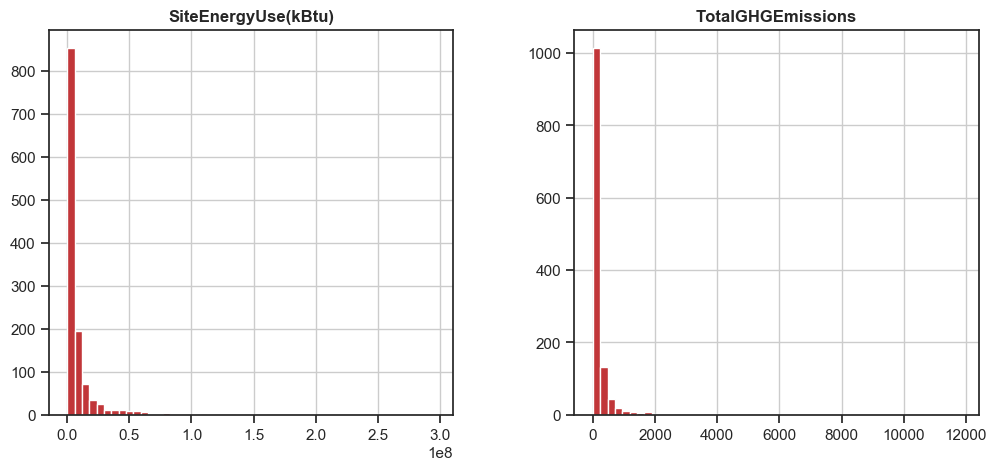

In [66]:
data_2015[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']].hist(bins=50, figsize=(12, 5))
folder_path=os.path.join("charts")
if not os.path.isdir(folder_path):
    os.makedirs(folder_path)
plt.savefig("charts/targets_hist.png", bbox_inches = "tight")
plt.show()

Nous constatons que la distribution est fortement asymétrique pour les deux variables. La forme s'apparente plus à une distribution log normale que normale. Or, en général les algorithmes de Machine Learning (ML) sont plus performants quand les données suivent une distribution normale. Appliquons le log sur les deux variables, et regardons si on obtient une distribution un peu plus proche d'une cloche, forme typique de la distribution normale.

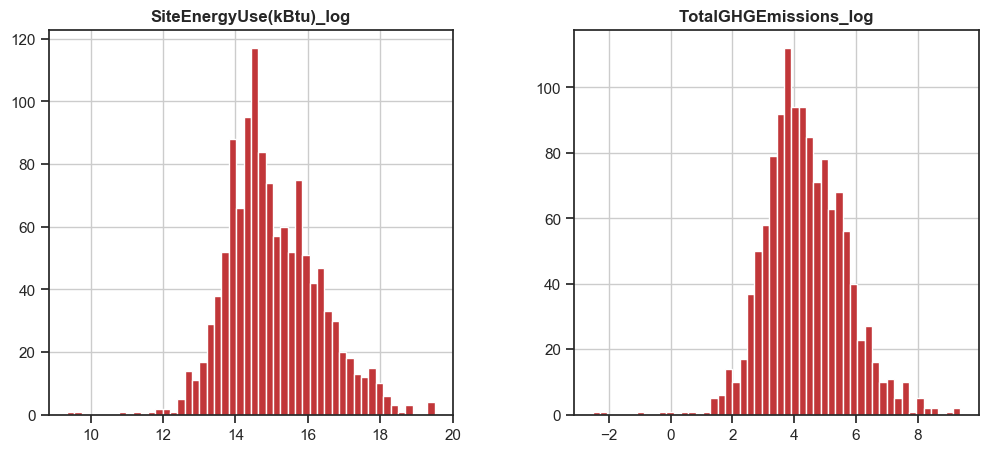

In [67]:
df = data_2015.copy()
df['SiteEnergyUse(kBtu)_log'] = np.log(df['SiteEnergyUse(kBtu)'])
df['TotalGHGEmissions_log'] = np.log(df['TotalGHGEmissions'])
df[['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log']].hist(bins=50, figsize=(12, 5))
plt.savefig("charts/targets_log_hist.png", bbox_inches = "tight")
plt.show()

C'est nettement mieux. **Nous entrainerons donc nos modèles sur le logarithme de ces variables. Puis nous appliquerons l'exponentielle sur les prédictions pour obtenir les bonnes valeurs.**

In [68]:
data_2015['SiteEnergyUse(kBtu)_log'] = np.log(data_2015['SiteEnergyUse(kBtu)'])
data_2015['TotalGHGEmissions_log'] = np.log(data_2015['TotalGHGEmissions'])

### Analyse de l'ENERGY STAR Score

Comme nous cherchons aussi à évaluer l'intérêt de l'**ENERGY STAR Score**, il serait pertinent de regarder cette dernière plus en détail avant de nous occuper des autres variables.

Dans notre jeu de donnée, ce score est renseigné par la variable *ENERGYSTARScore*.

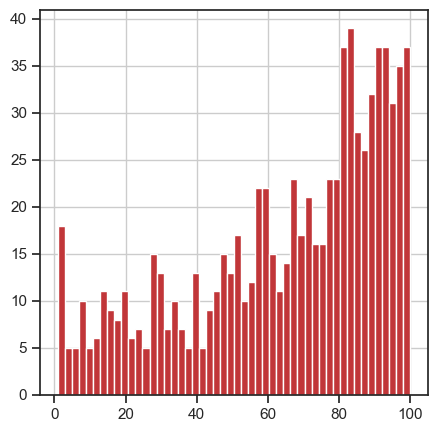

In [69]:
data_2015['ENERGYSTARScore'].hist(bins=50, figsize=(5, 5))
plt.savefig("charts/energystar_hist.png", bbox_inches = "tight")
plt.show()

Nous observons une distribution asymétrique, presque triangulaire. La distribution semble fortement éloignée de celles des variables cibles. Ceci peut être dû au fait que l'Énergie Star Score mesure l'efficacité énergétique. Or, pour mesurer cette dernière il nécessaire de prendre en compte la surface des bâtiments. il serait donc plus pertinent de comparer l'Énergie Star non pas directement à la consommation (ou émission) mais à l'intensité de consommation (ou d'émission), ie. aux variables :
- SiteEUI(kBtu/sf)
- GHGEmissionsIntensity

Un moyen rapide et visuel de comparer ces trois variables est d'utiliser un pair plot, pour cela nous utiliserons la méthode `scatter_matrix()` du module pandas.plotting.

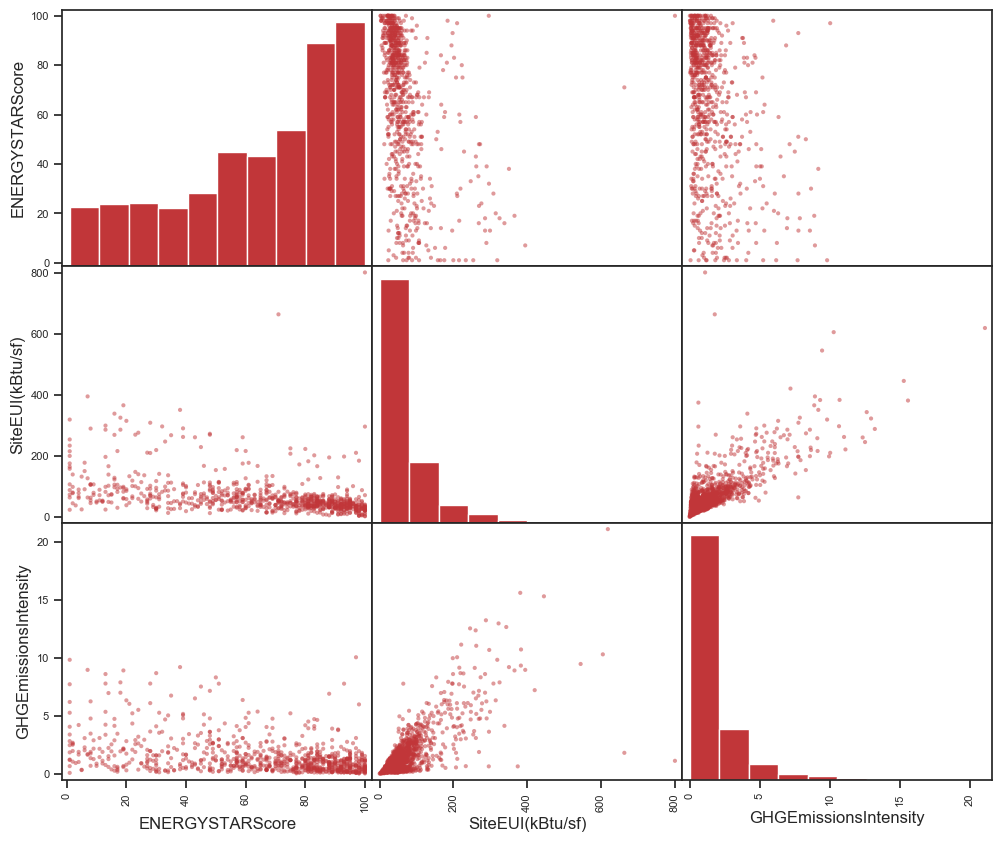

In [70]:
from pandas.plotting import scatter_matrix

features = ['ENERGYSTARScore','SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
scatter_matrix(data_2015[features], figsize=(12, 10))
plt.savefig("charts/energystar_pairplot.png", bbox_inches = "tight")
plt.show()

De nouveau nous obtenons des distributions très éloignées. Il serait donc assez surprenant que la variable ENERGY STAR soit clé pour prédire la consommation totale d'énergie ou bien encore l'émission de CO2. 

## Traitement des variables quantitatives

Nous commencerons pas analyser les variables quantitatives, ie. les variables les plus simples à traiter. 

### Les variables de consommation

L'objectif final étant de nous passer des relevés de consommation annuels, nous allons devoir transformer un peu les variables liées à la consommation.

Par exemple au lieu de garder la consommation de chaque type d'énergie nous pourrions calculer la proportion que représente ces énergie dans la consommation totale. Nous pourrions aussi calculer le pourcentage de sources énergétiques primaires (fuel, gaz naturel) et secondaires (vapeur, électricité).

Dans la partie I, nous avions retiré la variable *OtherFuel(kBtu)* car :
1. Elle n'était pas présente dans les données de 2016
2. Elle était systématiquement supérieure aux valeurs obtenues en retranchant la somme des autres sources énergétiques à la consommation totale.

Nous allons commençons par recréer cette variable, en imposant que cette variable soit égale à 0 si la la somme des autres sources énergétiques est supérieure à la consommation totale. Comme on travaillera ensuite avec des ratio, ces cas ne seront pas problématique. Pour l'instant on veut juste éviter d'avoir une consommation négative.

In [71]:
data_2015.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'SiteEnergyUse(kBtu)_log',
       'TotalGHGEmissions_log'],
      dtype='object')

In [72]:
att_conso = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

data_2015['OtherFuel(kBtu)'] = data_2015['SiteEnergyUse(kBtu)'] - data_2015[att_conso].sum(axis=1)
# equalize all negative values to 0
cond = data_2015['OtherFuel(kBtu)'] >= 0
data_2015['OtherFuel(kBtu)'].where(cond, 0, inplace=True)

Nous pouvons maintenant caculer les ratio pour chaque énergie.

In [73]:
att_conso += ['OtherFuel(kBtu)']
for c in att_conso:
    name = c.replace("(kBtu)", "") + "_ratio"
    data_2015[name] = data_2015[c] / data_2015[att_conso].sum(axis=1)

Puis les ratio pour les énergie primaires et secondaires.

In [74]:
data_2015['Primary_ratio'] = data_2015['NaturalGas_ratio'] + data_2015['OtherFuel_ratio']
data_2015['Secondary_ratio'] = data_2015['SteamUse_ratio'] + data_2015['Electricity_ratio']